(intro_prob_notebook)=
# Introduzione al calcolo delle probabilità

In questa parte della dispensa verrà introdotta la teoria delle probabilità. Prima di entrare nei dettagli, cerchiamo di capire perché la probabilità sia così importante per la ricerca scientifica.

La teoria delle probabilità è cruciale per la scienza perché la ricerca procede mediante l'inferenza induttiva. Non siamo mai completamente sicuri della verità di una proposizione (ipotesi, teoria): al valore di verità di una proposizione possiamo solo assegnare un grado di certezza probabilistico. L'approccio bayesiano è una scuola di pensiero che usa la probabilità per quantificare il grado di fiducia che può essere attribuito ad una proposizione. L'inferenza statistica bayesiana è un tipo di inferenza induttiva che ha lo scopo di quantificare la fiducia che si ha nell'ipotesi $H$ dopo avere osservato il dato di evidenza $E$. Per quantificare un tale grado di fiducia l'inferenza statistica bayesiana utilizza, appunto, la teoria delle probabilità. Una comprensione dell'inferenza statistica bayesiana richiede dunque, preliminarmente, la conoscenza (di almeno gli elementi di base) della teoria delle probabilità.

In [360]:
import pandas as pd
import itertools as it
from matplotlib import pyplot as plt
import seaborn as sns
import random
from numpy import random
import numpy as np
from scipy.stats import bernoulli, binom
import empiricaldist
from scipy.constants import golden

In [362]:
%matplotlib inline
sns.set_theme(
    context="paper",
    style="darkgrid",
    palette="colorblind",
    rc={'figure.figsize': (5.0, 5.0/golden)},
)
SEED = 123456
rng = np.random.default_rng(SEED)

## Che cos'è la probabilità?

La definizione della probabilità è un problema estremamente dibattuto ed aperto. Sono state fornite due possibili soluzioni al problema di definire il concetto di probabilità.

- La natura della probabilità è "ontologica" (ovvero, basata sulla metafisica): la probabilità è una proprietà della della realtà, del mondo, di come sono le cose, indipendentemente dalla nostra esperienza. È una visione che qualcuno chiama "oggettiva".
- La natura della probabilità è "epistemica" (ovvero, basata sulla conoscenza): la probabilità si riferisce alla conoscenza che abbiamo del mondo, non al mondo in sé. Di conseguenza è detta, in contrapposizione alla precedente definizione, "soggettiva".

Il primo tentativo di definire la probabilità si è servito del calcolo combinatorio ed è attribuito a Pierre-Simon Laplace (1749–1827). Nel suo saggio, Laplace ha definito la probabilità $P$ del verificarsi di un dato evento come il rapporto tra il numero di casi in cui l'evento può verificarsi e il numero totale di eventi possibili. Qui, un evento è definito come qualcosa a cui possiamo assegnare un valore di verità, cioè qualcosa che può essere vero o falso. Un esempio molto semplice di tale definizione può essere fatto usando i dadi. La probabilità di ottenere 3 nel lancio di un singolo dado è 1/6 ≃ 0.17, perché c'è un caso favorevole (il lancio ha portato a 3) su sei casi possibili (i numeri da 1 a 6). Analogamente, la probabilità di estrarre un asso da un mazzo di 54 carte (52 figure e 2 jolly) è 4/54 ≃ 0.074, perché ci sono quattro assi in un mazzo. 

Una tale definizione è insoddisfacente, perché, per calcolare la probabilità di un evento, dobbiamo assumere che la probabilità di ogni evento sia la stessa, cioè che ogni evento sia equiprobabile. Da un punto di vista formale, inoltre, è circolare definire il concetto di probabilità assumendo che ogni evento abbia la stessa probabilità: è necessario sapere cosa significa "equiprobabile" per definire il concetto di probabilità.

Un secondo tentativo di definire la probabilità è il cosiddetto approccio frequentista, che può essere attribuito a molti autori (si veda la corrispondente pagina di Wikipedia per un resoconto completo dei contributi). In questo approccio, la probabilità è definita sulla base delle frequenze osservate dell'occorrenza di un evento. La necessità di questa nuova definizione deriva dal fatto che spesso è difficile, se non impossibile, assegnare una probabilità agli eventi assumendo il principio di equiprobabilità, come nel caso dei dadi o delle carte di un mazzo. Chiaramente la probabilità di ottenere 3 come risultato del lancio lancio di un dado è 1/6 se crediamo che il dado sia bilanciato. Se così non fosse (ed è molto probabile che non sia così, a causa delle imperfezioni nella costruzione del dado), non possiamo assegnare la stessa probabilità a tutti i risultati possibili. Tuttavia, possiamo stimare le probabilità come la frequenza $f_3$, definita come

$$
f_3 = \frac{n_3}{N},
$$

dove $n_3$ è il numero di volte in cui un lancio ha prodotto 3 in un insieme di $N$ lanci. Chiaramente, questa è solo un'approssimazione della probabilità. Infatti, se effettuiamo una nuova serie di $N$ lanci, è molto improbabile ottenere lo stesso numero di 3, $n_3$, come in precedenza. Tuttavia, ci aspettiamo che $n_3'$ sia simile a $n_3$ se $N$ è abbastanza grande. Maggiore è $N$, migliore è la stima della probabilità. In linea di principio si può dire che la probabilità di ottenere 3, $P(3)$, è

$$
𝑃(3)= \lim_{N \rightarrow \infty}\frac{n_3}{N}.
$$

Tuttavia, in questo caso, il limite non è un limite matematico ma un limite sperimentale, ed è chiaramente impossibile osservare i risultati di un numero infinito di prove. Anche in questo caso, quindi, la definizione di probabilità non è così ovvia: essa dipende dagli eventi accaduti nel passato, i quali devono essere assunti come rappresentativi dell'intero insieme degli eventi possibili, cioè devono avere la stessa probabilità degli eventi futuri.

In entrambi i casi valgono le seguenti regole. Se un evento è impossibile, la sua probabilità è nulla. Se un evento è certo, la sua probabilità è 1.

Un approccio più moderno consiste nella cosiddetta probabilità bayesiana, da Thomas Bayes (1701–1761). In questo approccio, la probabilità è considerata una valutazione soggettiva del grado di convinzione che qualcosa accadrà. Spesso è espresso in termini di scommessa. Questa è la caratterizzazione epistemica della probabilità.

In termini epistemici, la probabilità fornisce una misura della nostra incertezza sul verificarsi di un evento, alla luce delle informazioni disponibili. Potremmo dire che c'è una "scala" naturale che ha per estremi il vero (1: evento certo), da una parte, ed il falso (0: evento impossibile), dall'altra. La probabilità è la quantificazione di questa scala: descrive lo stato della nostra incertezza rispetto al contenuto di verità di una proposizione.

L'incertezza nelle nostre previsioni può sorgere per due ragioni fondamentalmente diverse. La prima è dovuta alla nostra ignoranza relativamente alle cause nascoste sottostanti o dei meccanismi che generano i dati. Questa è, appunto, un'incertezza *epistemica*. Il secondo tipo di incertezza deriva invece dalla variabilità intrinseca dei fenomeni, che non può essere ridotta anche se raccogliamo più dati. Questa seconda forma di incertezza è talvolta chiamata *aleatoria*. Come esempio concreto, consideriamo il lancio di una moneta equilibrata. Sappiamo con certezza che la probabilità di testa è $P = 0.5$, quindi non c'è incertezza epistemica, ma non questo non è sufficiente per prevedere con certezza il risultato -- in altre parole, l'incertezza aleatoria persiste anche in assenza di incertezza epistemica.

L'interpretazione bayesiana di probabilità si contrappone all'interpretazione frequentista. Nell'interpretazione frequentista, la probabilità $P(E)$ rappresenta la frequenza relativa a lungo termine di un grande numero di ripetizioni di un esperimento casuale sotto le medesime condizioni. Viene stressata qui l'idea che ciò di cui parliamo è qualcosa che emerge nel momento in cui è possibile ripetere l'esperimento casuale tante volte sotto le medesime condizioni -- sono invece esclusi gli eventi unici e irripetibili.

L'interpretazione bayesiana della probabilità fa invece ricorso ad una concezione più ampia, non legata al solo evento in sé, ma che include anche il soggetto assegnante la funzione di probabilità. In pratica l'assegnazione di probabilità bayesiana viene effettuata dal decisore, in base alle proprie conoscenze a priori integrate con tutto il generico bagaglio culturale personale. In questo modo, la probabilità non sarà obbligatoriamente la stessa per tutti i soggetti, ma variarierà a seconda delle informazioni a disposizione, dell'esperienza personale e soprattutto del punto di vista proprio di ogni decisore ed è dunque assimilabile al "grado di fiducia" -- in inglese *degree of belief* -- di un dato soggetto, in un dato istante e con un dato insieme d'informazioni, circa l'accadere dell'evento $E$.

> \[N\]essuna scienza ci permetterà di dire: il tale fatto accadrà, andrà così e così, perché ciò è conseguenza di tale legge, e tale legge è una verità assoluta, ma tanto meno ci condurrà a concludere scetticamente: la verità assoluta non esiste, e quindi tale fatto può accadere e può non accadere, può andare così e può andare in tutt'altro modo, nulla io ne so. Quel che si potrà dire è questo: io prevedo che il tale fatto avverrà, e avverrà nel tal modo, perché l'esperienza del passato e l'elaborazione scientifica cui il pensiero dell'uomo l'ha sottoposta mi fanno sembrare ragionevole questa previsione" (De Finetti, 1931). 

```{admonition} Nota
La caratterizzazione 'epistemica' della nozione di probabilità può essere chiarita facendo riferimento all'esempio prototipico con il quale la probabilità viene solitamente descritta, ovvero come una frequenza relativa. A questo proposito, McElreath ci chiede di riflettere con maggiore attenzione sul fenomeno costituito da una sequenza di lanci di una moneta, ovvero l'esempio tradizionale con il quale si descrive un evento "aleatorio". Ingenuamente potremmo pensare che un tale fenomeno sia "casuale", nel senso che, all'interno della sequenza, non vi è alcuna informazione negli eventi (lanci) passati che sia utile per prevedere gli eventi futuri. Ma non è così. Il lancio di una moneta è un fenomeno deterministico, regolato dalle leggi fisiche. Infatti, sono state create delle macchine che, applicando la stessa forza ogni volta, sono in grado di ripetere lo stesso esito (testa o croce) in ogni prova. Questo significa che la "casualità" della sequenza di lanci non è una proprietà del fenomeno fisico che vorremmo descrivere (i fenomeni fisici sono sempre deterministici in quanto sono regolati dalle leggi della fisica) ma bensì è epistemica, ovvero riguarda lo stato dell'informazione disponibile all'osservatore.
```

### Formalizzazione dell'incertezza

La caratterizzazione della probabilità quale rappresentazione dell'incertezza epistemica è stata formalizzata in ambito bayesiano da Ramsey e de Finetti. De Finetti riconduce l'assegnazione di probabilità allo scommettere sul verificarsi di un evento: la probabilità di un evento $E$ è la quota $p(E)$ che un individuo reputa di dover pagare ad un banco per ricevere "1" ovvero "0" verificandosi o non verificandosi $E$.

In termini formali, secondo De Finetti, le valutazioni di probabilità degli eventi devono rispondere ai principi di equità e coerenza.

-   Una scommessa risponde al principio di *equità* se il ruolo di banco e giocatore sono scambiabili in ogni momento del gioco e sempre alle stesse condizioni.
-   Una scommessa risponde al principio di *coerenza* se non vi sono combinazioni di scommesse che consentano (sia al banco che al giocatore) di realizzare perdite o vincite certe.

L'approccio definettiano dell'impostazione della scommessa si basa dunque sulle assunzioni di razionalità e coerenza del decisore, al quale è fatto esplicito divieto di effettuare scommesse a perdita o guadagno certo. Il decisore, proponendo la scommessa, deve essere disposto a scambiare il posto dello scommettitore con quello del banco.

Il metodo della scommessa, oltre che una definizione, fornisce un mezzo operativo di assegnazione della probabilità. Sulla base di questa definizione operativa, che si può ritenere ragionevolmente soddisfatta dal comportamento di un qualunque individuo che agisca in modo razionale in condizioni di incertezza, possono essere agevolmente dimostrate tutte le proprietà classiche della probabilità: essa non può assumere valori negativi, né può essere superiore all'unità; se $E$ è un evento certo, la sua probabilità è 1; se invece $E$ è un evento impossibile, la sua probabilità è 0.

I problemi posti dall'approccio definettiano riguardano l'arbitrarietà dell'assegnazione soggettività di probabilità la quale sembra negare la validità dell'intero costrutto teorico. In risposta a tale critica, i bayesiani sostengono che gli approcci oggettivisti alla probabilità nascondono scelte arbitrarie preliminari e sono basate su assunzioni implausibili. È molto più onesto esplicitare subito tutte le scelte arbitrarie effettuate nel corso dell'analisi in modo da controllarne coerenza e razionalità.

```{admonition} Nota
Per chi desidera approfondire, un'introduzione molto leggibile alle tematiche della definizione della probabilità nella storia della scienza è fornita nel primo capitolo del testo *Bernoulli's fallacy* {cite:p}`clayton2021bernoulli`.
```

## Variabili casuali e probabilità di un evento

Esaminiamo qui di seguito alcuni concetti di base della teoria delle probabilità, la quale può essere intesa come un'estensione della logica.

### Eventi e probabilità

Nella teoria delle probabilità il risultato "testa" nel lancio di una moneta è chiamato *evento*.[^015_prob_intro-1] Un evento, denotato da una variabile binaria, corrisponde ad uno stato del mondo che si verifica oppure no. Ad esempio, $Y$ = 1 può denotare l'evento per cui il lancio di una moneta produce il risultato testa. Il funzionale $P(Y)$ denota la probabilità con cui si ritiene che l'evento $Y$ sia vero (o la proporzione di volte che si verifica tale evento osservando a lungo termine delle ripetizioni indipendenti di un esperimento casuale). Ad esempio, per il lancio di una moneta equilibrata, la probabilità dell'evento "il risultato del lancio della moneta è testa" è scritta come $P(Y = 1) = 0.5.$

Se la moneta è equilibrata dobbiamo anche avere $P(Y = 0) = 0.5$. I due eventi $Y$ = 1 e $Y$ = 0 sono *mutuamente esclusivi* nel senso che non possono entrambi verificarsi contemporaneamente: $P(Y = 1\; \land \; Y = 0) = 0.$ Gli eventi $Y$ = 1 e $Y$ = 0 di dicono *esaustivi*, nel senso che almeno uno di essi deve verificarsi e nessun altro tipo di evento è possibile. Nella notazione probabilistica, $P(Y = 1\; \lor \; Y = 0) = 1.$ Il connettivo logico "o" ($\lor$) specifica eventi *disgiunti*, ovvero eventi che non possono verificarsi contemporaneamente (eventi *incompatibili*) e per i quali, perciò, la probabilità della loro congiunzione è $P(A \; \land \; B) = 0$. Il connettivo logico "e" ($\land$), invece, specifica eventi *congiunti*, ovvero eventi che possono verificarsi contemporaneamente (eventi *compatibili*) e per i quali, perciò, la probabilità della loro congiunzione è $P(A \; \land \; B) > 0$. La probabilità del verificarsi di due eventi congiunti $A$ e $B$ si può denotare, in maniera equivalente, con la notazione precedente, oppure con $P(A \cap B)$, oppure con $P(A, B)$.

Si richiede che $0 \leq P(A) \leq 1$, dove $P(A) = 0$ denota l'evento impossibile e $P(A) = 1$ denota l'evento certo. Scriviamo $P(\lnot A)$ o $P(\bar{A})$ per denotare la probabilità che l'evento $A$ non avvenga; questa probabilità è definita come $P(\bar{A}) = 1 − P(A)$.

### Spazio campione e risultati possibili

Anche se il lancio di una moneta produce sempre uno specifico risultato nel mondo reale, possiamo anche immaginare i possibili risultati alternativi che si sarebbero potuti osservare. Quindi, anche se in uno specifico lancio la moneta dà testa ($Y$ = 1), possiamo immaginare la possibilità che il lancio possa avere prodotto croce ($Y$ = 0). Tale ragionamento controfattuale è la chiave per comprendere la teoria delle probabilità e l'inferenza statistica.

Sia $Y$ il risultato del lancio di moneta equilibrata; non di un generico lancio di una moneta, ma un'istanza specifica del lancio di una specifica moneta in un dato momento. Definita in questo modo, $Y$ è una *variabile casuale*, ovvero una variabile i cui valori non possono essere previsti con esattezza. Se la moneta è equilibrata, c'è una probabilità del 50% che il lancio della moneta dia come risultato "testa" e una probabilità del 50% che dia come risultato "croce". Per facilitare la trattazione, le variabili casuali assumono solo valori numerici. Per lo specifico lancio della moneta in questione, diciamo, ad esempio, che la variabile casuale $Y$ assume il valore 1 se esce testa e il valore 0 se esce croce.

I risultati possibili che si possono osservare come conseguenza del lancio di una moneta determinano i valori possibili che la variabile casuale può assumere. Una variabile casuale può essere *discreta* o *continua*. Una variabile casuale discreta può assumere un numero finito di valori $x_1, \dots ,x_n$, in corrispondenza degli eventi $E_i, \dots, E_n$ che si verificano con le rispettive probabilità $p_1, \dots, p_n$. Un esempio è il punteggio totale di un test psicometrico costituito da item su scala Likert. Invece un esempio di una variabile casuale continua è la distanza tra due punti, che può assumere infiniti valori all'interno di un certo intervallo. 

L'insieme $\Omega$ di tutti i risultati possibili, ovvero l'insieme dei valori che la variabile casuale può assumere, è chiamato *spazio campione* (*sample space*). Lo spazio campione può essere concettualizzato come un'urna contenente una pallina per ogni possibile risultato del lancio della moneta. Su ogni pallina è scritto il valore della variabile casuale. Uno specifico lancio di una moneta -- ovvero, l'osservazione di uno specifico valore di una variabile casuale -- è chiamato *esperimento casuale*.

Il lancio di un dado ci fornisce l'esempio di un altro esperimento casuale. Supponiamo di essere interessati all'evento "il lancio del dado produce un numero dispari". Un *evento* seleziona un sottoinsieme dello spazio campione: in questo caso, l'insieme dei risultati $\{1, 3, 5\}$. Se esce 3, per esempio, diciamo che si è verificato l'evento "dispari" (ma l'evento "dispari" si sarebbe anche verificato anche se fosse uscito 1 o 5).

### Variabili casuali multiple

Le variabili casuali non esistono isolatamente. Abbiamo iniziato con una sola variabile casuale $Y$ che rappresenta il risultato del lancio di una moneta equlibrata. Ma supponiamo di lanciare la moneta tre volte. I risultati di ciascuno dei tre lanci possono essere rappresentati da una diversa variabile casuale, ad esempio, $Y_1 , Y_2 , Y_3$. Possiamo assumere che ogni lancio sia indipendente, ovvero che non dipenda dal risultato degli altri lanci. Per ciascuna di queste variabili $Y_n$, con $n \in 1:3$, abbiamo che $P(Y_n =1)=0.5$ e $P(Y_n =0)=0.5$.

È possibile combinare più variabili casuali usando le operazioni aritmetiche. Se $Y_1 , Y_2, Y_3$ sono variabili casuali che rappresentano tre lanci di una moneta equilibrata (o, in maniera equivalente, un lancio di tre monete equilibrate), possiamo definire la somma di tali variabili casuali come

$$
Z = Y_1 + Y_2 + Y_3.
$$

Una variabile casuale le cui modalità possono essere costituite solo da numeri interi è detta *variabile casuale discreta*:

$$
\mathbb{Z} = \dots, -2, -1, 0, 1, 2, \dots
$$

(sec-fun-mass-prob)=
## Funzione di massa di probabilità

La caratteristica fondamentale di una variabile casuale è data dall'insieme delle probabilità dei suoi valori, detta *distribuzione di probabilità*. Nel seguito useremo la notazione $P(\cdot)$ per fare riferimento alle distribuzioni di probabilità delle variabili casuali discrete e $p(\cdot)$ per fare riferimento alla densità di probabilità delle variabili casuali continue. In questo contesto, l'insieme dei valori che la variabile casuale può assumere è detto *supporto* della sua distribuzione di probabilità. Il supporto di una variabile casuale può essere finito (come nel caso di una variabile casuale uniforme di supporto $[a, b]$) o infinito (nel caso di una variabile causale gaussiana il cui supporto coincide con la retta reale).

È conveniente avere una funzione che associa una probabilità a ciascun possibile valore di una variabile casuale. In generale, ciò è possibile se e solo se la variabile casuale è discreta, così com'è stata definita nel paragrafo precedente. 

Consideriamo ora, quale esempio, l'esperiemento casuale del lancio di due dadi equilibrati a 6 facce. Definiamo la variabile casuale $Z = D_1 + D_2$ come la somma dei punti ottenuti dai due lanci. Esaminiamo lo spazio campione:

In [8]:
r = range(1, 7)
sample = [(i, j) for i in r for j in r]
sample

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

In corrispondenza del primo punto dello spazio campione elencato sopra, $Z$ assume valore 2; corrispondenza del secondo punto assume valore 3, ecc. 

Le sequenze come (1, 1), (1, 2), ecc. sono chiamate "eventi elementari" (ovvero, corrispondono ad un possibile esito dell'esperimento casuale). Lo spazio campione di questo esperimento casuale è costituito da 36 eventi elementari:

In [9]:
len(sample)

36

L'evento $Z = u$, con $u \in 2 \dots, 12$ è un "evento composto", il quale può essere costituito da più eventi elementari. Per esempio, l'evento $Z$ = 2 è composto da un unico evento elementare: (1, 1); l'evento $Z$ = 3 è composto da due eventi elementari: (1, 1) e (1, 2); e così via.

Nel nostro esempio costruito usando Python, ogni elemento della lista `sample` è una lista di due elementi. Per trovare il valore della variabile casuale $Z$, dunque, dobbiamo sommare. In corrispondenza del primo punto campione (1, 1) il valore di $Z$ è 2:

In [20]:
sum(sample[0])

2

In corrispondenza dell'ultimo punto dello spazio campione (6, 6), il valore di $Z$ è 12:

In [28]:
sum(sample[35])

12

Creo ora la lista `z` che memorizza il valore assunto dalla variabile casuale $Z$ in corrispondenza di ciascun punto dello spazio campione:

In [10]:
z = [sum(point) for point in sample]
z

[2,
 3,
 4,
 5,
 6,
 7,
 3,
 4,
 5,
 6,
 7,
 8,
 4,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 8,
 9,
 10,
 6,
 7,
 8,
 9,
 10,
 11,
 7,
 8,
 9,
 10,
 11,
 12]

Conto ora quante volte si presenta ciascun valore possibile $Z$ nello spazio campione:

In [51]:
r = range(1, 7)
sample = [(i, j) for i in r for j in r]

for i in range(2, 13):
    event = [roll for roll in sample if sum(roll) == i]
    print(f"z = {i} : {len(event)} / {len(sample)}")

z = 2 : 1 / 36
z = 3 : 2 / 36
z = 4 : 3 / 36
z = 5 : 4 / 36
z = 6 : 5 / 36
z = 7 : 6 / 36
z = 8 : 5 / 36
z = 9 : 4 / 36
z = 10 : 3 / 36
z = 11 : 2 / 36
z = 12 : 1 / 36


La variabile casuale $Z$ assume valore 2 in un solo punto dello spazio capione: (1, 1); assume valore 3 in corrispondenza di due punti dello spazio campione: (1, 2) e (2, 1); e così via. 

Calcolo ora la *proporzione* di volte in cui ciascun valore $Z$ si presenta nello spazio campione: 1/36, 2/36, ecc.: 

In [11]:
px = []

for i in range(2, 13):
    event = [roll for roll in sample if sum(roll) == i]
    px.append(len(event) / len(sample))

px


[0.027777777777777776,
 0.05555555555555555,
 0.08333333333333333,
 0.1111111111111111,
 0.1388888888888889,
 0.16666666666666666,
 0.1388888888888889,
 0.1111111111111111,
 0.08333333333333333,
 0.05555555555555555,
 0.027777777777777776]

In [12]:
list(zip(list(range(2, 13)), px))


[(2, 0.027777777777777776),
 (3, 0.05555555555555555),
 (4, 0.08333333333333333),
 (5, 0.1111111111111111),
 (6, 0.1388888888888889),
 (7, 0.16666666666666666),
 (8, 0.1388888888888889),
 (9, 0.1111111111111111),
 (10, 0.08333333333333333),
 (11, 0.05555555555555555),
 (12, 0.027777777777777776)]

La funzione $p_Z$ così ottenuta, ovvero

$$
\begin{array}{rclll}
p_Z(2) & =&  1/36 \\
p_Z(3) & = & 2/36 \\
p_Z(4) & = & 3/36 \\
p_Z(5) & = & 4/36 \\
p_Z(6) & = & 5/36 \\
p_Z(7) & = & 6/36 \\
p_Z(8) & = & 5/36 \\
p_Z(9) & = & 4/36 \\
p_Z(10) & = & 3/36 \\
p_Z(11) & = & 2/36 \\
p_Z(12) & = & 1/36 \\
\end{array}
$$

associa a ciascun valore $u$ della variabile casuale $Z$ la probabilità dell'evento $Z = u$. Abbiamo ottenuto le probabilità dividendo il numero di punti dello spazio campione che corrispondono allo stesso valore $D_1 + D_2$ per il numero totale dei punti che costiuiscono lo spazio campione.  Convenzionalmente, queste probabilità sono scritte come

$$
P_Z(z) = P(Z = z).
$$

L'espressione $P_Z(z)$ si può leggere come: "la probabilità che la variabile casuale $Z$ assuma il valore $z$". Una funzione definita come sopra è detta *funzione di massa di probabilità* della variabile casuale $Z$. Ad ogni variabile casuale discreta è associata un'unica funzione di massa di probabilità.

Se $A$ è un sottoinsieme della variabile casuale $Z$, allora denotiamo con $P_{z}(A)$ la probabilità assegnata ad $A$ dalla distribuzione $P_{z}$. Mediante una distribuzione di probabilità $P_{z}$ è possibile determinare la probabilità di ciascun sottoinsieme $A \subset Z$ come

$$
P_{z}(A) = \sum_{z \in A} P_{z}(Z = z).
$$

Una funzione di massa di probabilità soddisfa le proprietà

-   $0 \leq P(X=x) \leq 1$,
-   $\sum_{x \in X} P(x) = 1$.

Per l'esempio relativo al lancio di due dadi, la probabilità che la variabile casuale $Z$ sia un numero dispari è

$$
\begin{align}
P(\text{Z è un numero dispari}) &= P_{z}(Z = 3) + P_{z}(Z = 5) + P_{z}(Z = 7) + P_{z}(Z = 11)\notag\\
&= \frac{2}{36} + \frac{4}{36} + \frac{6}{36} + \frac{4}{36} + \frac{2}{36}\notag\\
&= \frac{1}{2}.\notag
\end{align}
$$

### Funzione di ripartizione

Data una variabile casuale discreta $X$ possiamo calcolare la probabilità che $X$ non superi un certo valore $x$, ossia la sua *funzione di ripartizione*. Poichè $X$ assume valori discreti possiamo cumulare le probabilità mediante una somma:

$$
F(x_k) = P(X \leq x_k) = \sum_{x \leq x_k} P(x).
$$

Per l'esempio relativo al lancio dei due dadi, la funzione di ripartizione della variabile casuale $Z$ è fornita nella tabella seguente.

```{table}
| z   | p(z) | p(z <= k) |
| --- | --- | --------- |
| 2   | 1/36 |  1/16    |
| 3   | 2/36 |  3/16    |
| 4   | 3/36 |  6/16    |
| 5   | 4/36 |  10/16   |
| 6   | 5/36 |  15/16   |
| 7   | 6/36 |  21/16   |
| 8   | 5/36 |  26/16   |
| 9   | 4/36 |  30/16   |
| 10  | 3/36 |  33/16   |
| 11  | 2/36 |  35/16   |
| 12  | 1/36 |  36/16   |
```

Ora che abbiamo capito come calcolare la distribuzione di massa di probabilità, usiamo le funzioni di `empiricaldist` che consentono di eseguire le operazioni precedenti con maggiore facilità. Creiamo la distribuzione di massa di probabilità per la variabile casuale corrispondente ai punti ottenuti dal lancio di un dado bilanciato a sei facce.

In [2]:
d1 = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
d1

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


Ora generiamo la distribuzione di massa di probabilità per la somma dei punti ottenuti dal lancio di due dadi equilibrati a sei facce.

In [11]:
d2 = d1.add_dist(d1)
d2

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [4]:
def decorate_dice(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Risultato')
    plt.ylabel('Distribuzione di massa di probabilità')
    plt.title(title)

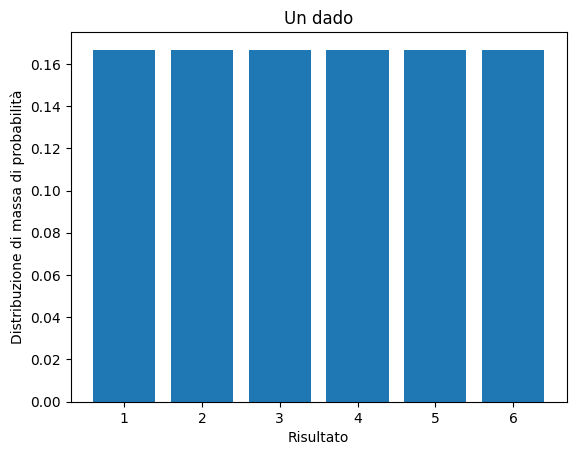

In [5]:
d1.bar()
decorate_dice('Un dado')

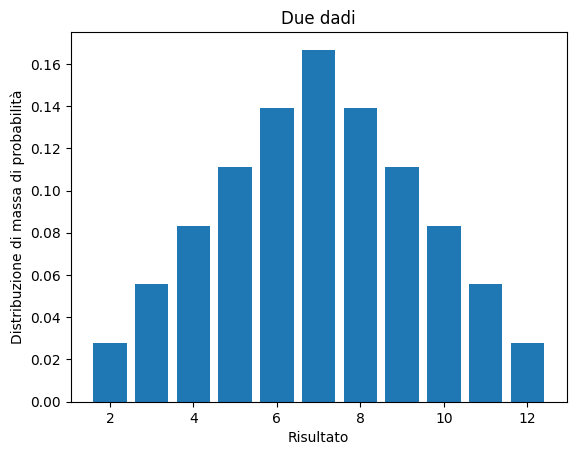

In [8]:
d2.bar()
decorate_dice('Due dadi')

Le probabilità della distribuzione di massa si ottengono con la notazione delle parentesi quadre. Ad esempio:

In [36]:
d2[2]

0.027777777777777776

Replichiamo ora il risultato precedente, ovvero troviamo la probabilità di ottenere un valore dispari dalla somma dei due dadi:

In [35]:
d2[3] + d2[5] + d2[7] + d2[9] + d2[11]

0.5

### Trovare la probabilità con una simulazione 

La distribuzione di massa di probabilità che abbiamo trovato in precedenza è esatta ma un risultato molto simile si può ottenere con una simulazione, ovvero generando un grande numero di ripetizioni dell'esperimento casuale.

Inizio con il definire una funzione che ritorna la somma dei punti prodotti dal lancio di due dadi. La funzione ha come argomento il numero di ripetizioni di questo esperimento casuale.


In [469]:
def dice(n):
    rolls = []
    for i in range(n):
        two_dice = random.randint(1, 7) + random.randint(1, 7)
        rolls.append(two_dice)
    return rolls


Eseguo 100,000 ripetizioni dell'esperimento casuale e memorizzo i risultati ottenuti.

In [473]:
nrolls = 100000
res = dice(nrolls)
print(*res[1:200])

4 8 5 5 8 11 8 9 3 9 5 10 6 6 7 6 4 9 5 6 8 5 9 6 8 8 7 7 7 4 9 8 7 10 6 3 6 4 8 8 7 9 6 7 5 8 4 5 7 10 7 10 5 4 6 9 11 5 6 12 7 6 6 4 4 9 6 4 8 9 9 5 9 5 7 12 7 2 5 3 5 10 10 5 9 4 8 6 10 6 7 10 5 8 7 8 8 8 12 11 9 7 6 5 7 4 10 3 7 3 8 3 7 7 8 6 12 5 6 9 12 5 3 4 10 11 11 6 5 6 11 5 9 7 11 7 8 9 9 7 10 11 10 2 7 5 11 7 7 8 7 5 3 10 11 6 8 3 5 11 6 5 4 9 7 7 3 7 4 7 6 10 3 9 10 6 4 5 4 8 6 8 10 10 4 11 11 6 8 6 8 11 11 7 2 5 6 3 7


Definisco un DatFrame con al suo interno la variabile `y` che corrisponde ai risultati delle 10,000 ripetizioni dell'esperimento casuale.

In [343]:
df = pd.DataFrame()
df["y"] = res 


Utilizzo ora il metodo `value_counts()`, che può essere applicato ad un DataFrame, come abbiamo visto nel capitolo {ref}`freq-distr-notebook`, per trovare le frequenze assolute di ciascuno dei possibili risultati dell'esperimento casuale (ovvero, 2, 3, ..., 12). Dividendo per il numero totale di ripetizioni trovo poi una stima empirica della probabilità. Si noti che i risultati sono simili a quelli teorici ottenuti in precedenza.

In [344]:
abs_freqs = df["y"].value_counts().sort_index()
px = abs_freqs / nrolls
list(zip(list(range(2, 13)), px))

[(2, 0.0268),
 (3, 0.0549),
 (4, 0.087),
 (5, 0.1103),
 (6, 0.1413),
 (7, 0.1651),
 (8, 0.1374),
 (9, 0.1115),
 (10, 0.0876),
 (11, 0.0525),
 (12, 0.0256)]


### La legge dei grandi numeri

Un modo per descrivere ciò che accade all'aumentare del numero $M$ di ripetizioni dell'esperimento casuale consiste nel registrare la stima della probabilità dell'evento $P(Y = y)$ in funzione del numero di ripetizioni dell'esperimento casuale per ogni $m \in 1:M$. Si può così ottenere una rappresentazione empirica della legge dei grandi numeri. 

```{admonition} Teorema
La *legge dei grandi numeri* dice che, all'aumentare del numero di ripetizioni dell'esperimento casuale, la media dei risultati ottenuti tende al valore teorico, man mano che vengono eseguite più prove. 
```

In con il codice seguente, simuliamo una serie di lanci di un dado generando in maniera casuale dei numeri interi compresi tra 1 e 6. Teniamo traccia della somma cumulativa dei lanci e del numero di lanci. Ad ogni passaggio, calcoliamo il valore medio dividendo la somma cumulativa per il numero di lanci. Infine, visualizziamo il valore medio dopo ogni lancio, insieme a una linea orizzontale che indica il valore atteso di 3.5, che è la media dei punti per un dado a sei facce.

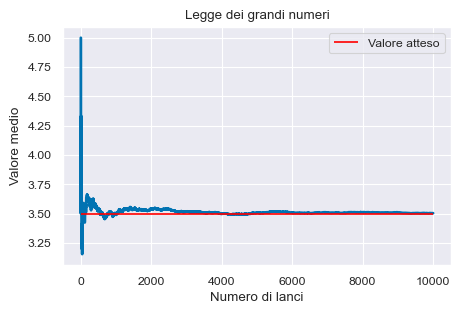

In [392]:
def simulate_dice_rolls(num_rolls):
    """Simulate dice rolls and return the average value for each roll."""
    total = 0
    averages = []
    for i in range(1, num_rolls + 1):
        roll = random.randint(1, 7)
        total += roll
        averages.append(total / i)
    return averages


def plot_dice_rolls(averages, num_rolls):
    """Plot the average value after each dice roll."""
    x = range(1, num_rolls + 1)
    plt.plot(x, averages, linewidth=2)
    plt.hlines(y=3.5, xmin=0, xmax=num_rolls, color="red", label="Valore atteso")
    plt.xlabel("Numero di lanci")
    plt.ylabel("Valore medio")
    plt.title("Legge dei grandi numeri")
    plt.legend()
    plt.show()


if __name__ == "__main__":
    num_rolls = 10000
    averages = simulate_dice_rolls(num_rolls)
    plot_dice_rolls(averages, num_rolls)


## Commenti e considerazioni finali

In questo capitolo abbiamo visto come si costruisce lo spazio campione di un esperimento casuale, quali sono le proprietà di base della probabilità e come si assegnano le probabilità agli eventi definiti sopra uno spazio campione discreto. Abbiamo anche introdotto le nozioni di variabile casuale, ovvero di una variabile che assume i suoi valori in maniera casuale. Abbiamo descritto il modo di specificare la probabilità con cui sono una variabile casuale assume i suoi differenti valori, ovvero la funzione di ripartizione $F(X) = P(X < x)$ e la funzione di massa di probabilità. Infine, sono stati forniti alcuni esempi relativi all'uso di vari strumenti del linguaggio Python per calcolare le probabilità: liste, cicli `for`, *list comprehension*, creazione di funzioni, funzioni del modulo `itertools`, ecc.

## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w